In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphing
import plotly.express as px #graphing
import seaborn as sns #graphing

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)        

/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv


In [2]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-oct-2022/train_0.csv")

In [3]:
df.head()

game_num  event_id  event_time  ball_pos_x  ball_pos_y  ball_pos_z  \
0         1      1002  -33.313030        -0.0         0.0      1.8548   
1         1      1002  -33.206146        -0.0         0.0      1.8548   
2         1      1002  -33.098114        -0.0         0.0      1.8548   
3         1      1002  -32.993190        -0.0         0.0      1.8548   
4         1      1002  -32.887756        -0.0         0.0      1.8548   

   ball_vel_x  ball_vel_y  ball_vel_z  p0_pos_x   p0_pos_y  p0_pos_z  \
0        -0.0         0.0         0.0   41.8048 -51.925000    0.3402   
1        -0.0         0.0         0.0   42.2616 -52.451202    0.3402   
2        -0.0         0.0         0.0   43.2270 -54.054000    1.1466   
3        -0.0         0.0         0.0   43.8984 -55.225600    1.5936   
4        -0.0         0.0         0.0   44.9606 -57.087800    2.0720   

    p0_vel_x  p0_vel_y  p0_vel_z  p0_boost  p1_pos_x  p1_pos_y  p1_pos_z  \
0   5.635400   -4.8490    0.0042     33.34   -5.0654  -75.5194    0.3402   
1   5.287199   -7.4774    0.0042     33.34   -4.9298  -74.3264    0.4900   
2   5.686000   -9.7462    6.5052     33.34   -4.6880  -72.9590    1.0820   
3  10.595600  -18.5704    5.5184     33.34   -3.8408  -69.1258    1.9106   
4  10.632600  -18.6378    4.1670     33.34   -3.2720  -66.5944    1.9814   

   p1_vel_x   p1_vel_y  p1_vel_z  p1_boost  p2_pos_x   p2_pos_y  p2_pos_z  \
0    0.3602   9.960600    0.0000     27.33  -39.6544 -49.894398    0.3402   
1    2.2634  13.568199    6.0700     23.84  -38.6262 -48.871803    0.3402   
2    2.7758  15.537000    6.3438     23.14  -36.3452 -47.016200    1.1346   
3    5.6770  25.291800    4.2014     23.14  -35.1736 -45.288000    1.5598   
4    5.6902  25.318401   -0.3020     23.14  -34.0660 -43.518997    1.8632   

   p2_vel_x   p2_vel_y  p2_vel_z  p2_boost  p3_pos_x   p3_pos_y  p3_pos_z  \
0    8.8092   8.809400    0.0000     22.34    5.0604  75.532005    0.3402   
1   11.6062  11.244201    0.0000     30.62    5.0110  74.772995    0.3402   
2   16.1252  12.458199    6.2390     26.89    4.9168  73.767600    0.3402   
3   15.8896  26.249199    5.1802     23.38    4.6906  71.631400    0.4394   
4   17.1810  26.739600    4.0358     19.84    4.5010  69.921600    1.0822   

   p3_vel_x   p3_vel_y  p3_vel_z  p3_boost   p4_pos_x   p4_pos_y  p4_pos_z  \
0   -0.5236  -8.050600    0.0042     33.34 -41.766403  52.006400    0.3410   
1   -0.6998  -9.942000    0.0042     33.34 -42.407204  52.622402    0.5944   
2   -1.1922 -11.803600    0.0042     33.34 -43.778200  54.081400    1.6450   
3   -1.7122 -15.544201    5.9916     31.00 -44.919800  55.525200    2.1334   
4   -2.0104 -18.120400    6.3364     27.47 -46.170400  57.104400    2.2552   

    p4_vel_x   p4_vel_y  p4_vel_z  p4_boost   p5_pos_x   p5_pos_y  p5_pos_z  \
0  -5.437600   5.437800    0.0052     33.34  39.757400  49.821600    0.3402   
1  -7.172400   6.739800    6.2394     33.34  38.781400  48.761402    0.3402   
2 -12.416600  15.706600    6.0082     33.34  36.503998  46.920600    1.0214   
3 -12.483199  15.779799    4.7494     33.34  35.151800  44.873398    1.5286   
4 -12.518800  15.799200   -0.2730     33.34  33.584800  42.203400    1.9106   

   p5_vel_x   p5_vel_y  p5_vel_z  p5_boost  boost0_timer  boost1_timer  \
0   -8.2276  -9.275200   -0.0002     22.34           0.0           0.0   
1  -11.3378 -11.244000    0.0002     30.62           0.0           0.0   
2  -16.3572 -12.203199    6.2126     26.89           0.0           0.0   
3  -14.6028 -26.306002    4.9346     23.38           0.0           0.0   
4  -16.5764 -27.024800    1.3248     19.84           0.0           0.0   

   boost2_timer  boost3_timer  boost4_timer  boost5_timer  \
0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           

In [4]:
df.shape

(2149381, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149381 entries, 0 to 2149380
Data columns (total 61 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   game_num                     int64  
 1   event_id                     int64  
 2   event_time                   float64
 3   ball_pos_x                   float64
 4   ball_pos_y                   float64
 5   ball_pos_z                   float64
 6   ball_vel_x                   float64
 7   ball_vel_y                   float64
 8   ball_vel_z                   float64
 9   p0_pos_x                     float64
 10  p0_pos_y                     float64
 11  p0_pos_z                     float64
 12  p0_vel_x                     float64
 13  p0_vel_y                     float64
 14  p0_vel_z                     float64
 15  p0_boost                     float64
 16  p1_pos_x                     float64
 17  p1_pos_y                     float64
 18  p1_pos_z                     float64
 19  

<AxesSubplot:>

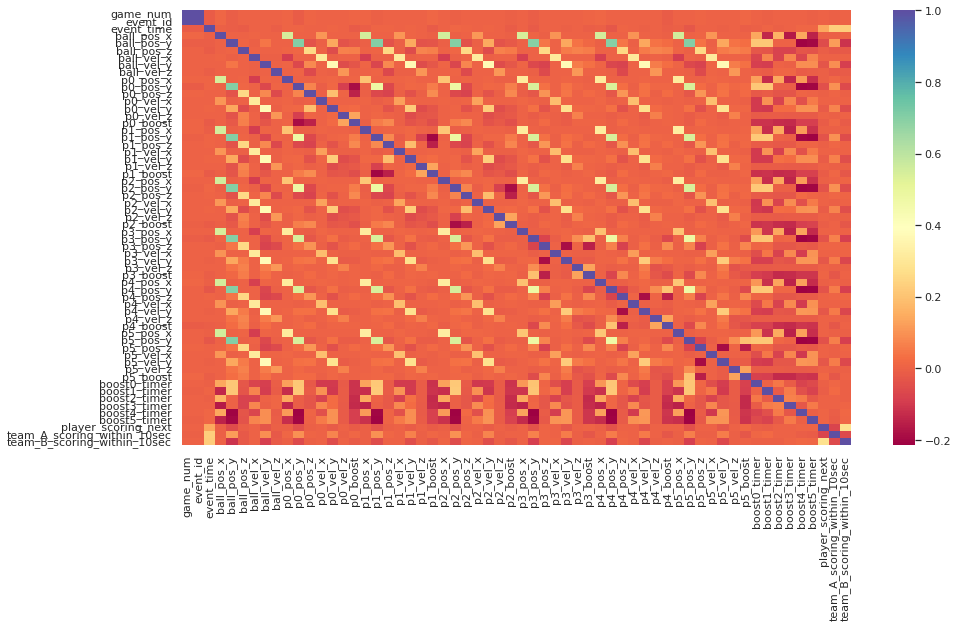

In [6]:
corr = df.corr()
sns.set(rc = {"figure.figsize": (15, 8)})

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "Spectral")

In [7]:
df.ball_pos_x.max()

80.691605

In [8]:
df.ball_pos_x.min()

-80.792

## We can see a goal event around index 1530 since the ball position x axis resets to 0 ⚽

<AxesSubplot:>

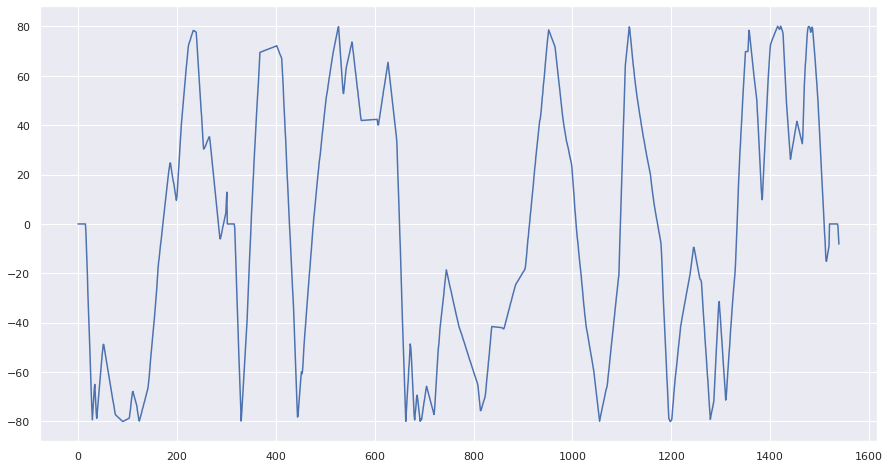

In [9]:
df_x = df.iloc[:1540]
df_x.ball_pos_x.plot()

## Also true for the y axis

<AxesSubplot:>

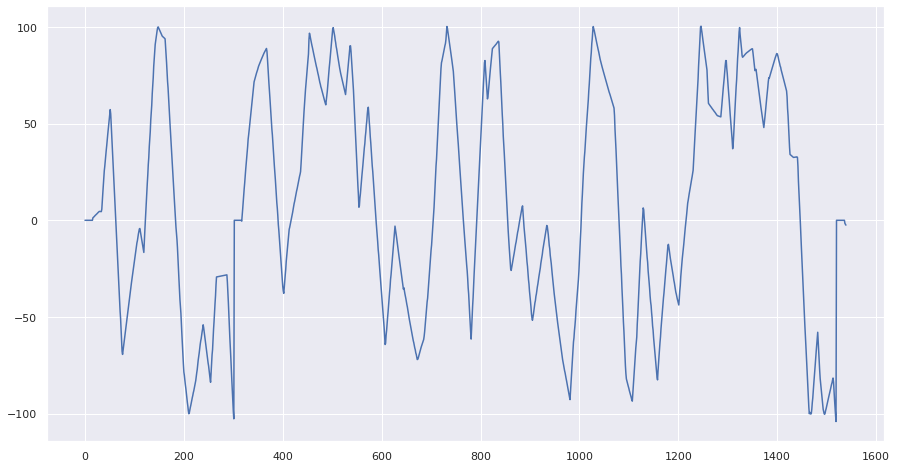

In [10]:
df_x.ball_pos_y.plot()

In [11]:
df.ball_pos_y.max()

104.3092

In [12]:
df.ball_pos_y.min()

-104.3092

In [13]:
df.ball_pos_z.max()

39.4372

In [14]:
df.ball_pos_z.min()

1.296

## team_A_scoring_within_10sec: 1 indicates the team will score within 10 seconds (target variable) ⚽

<AxesSubplot:>

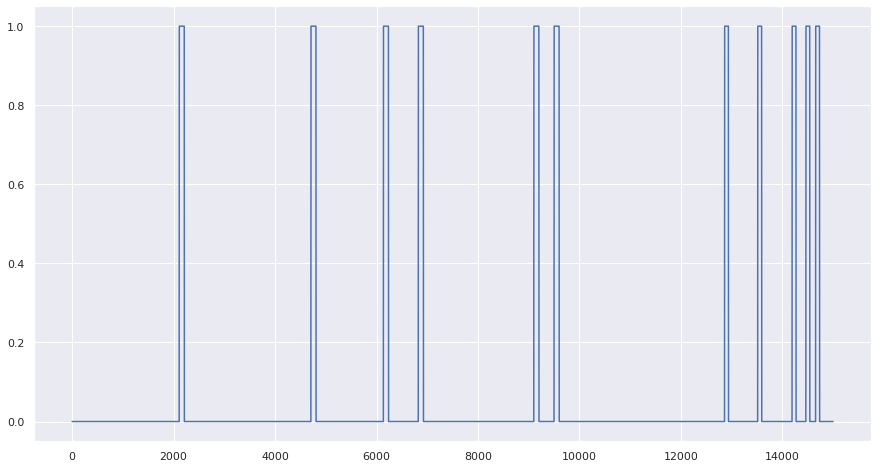

In [15]:
df_team_A = df.iloc[:15000]
df_team_A.team_A_scoring_within_10sec.plot()

## player_scoring_next: Ranges -1 to 5, 6 players in total. 🚘

<AxesSubplot:>

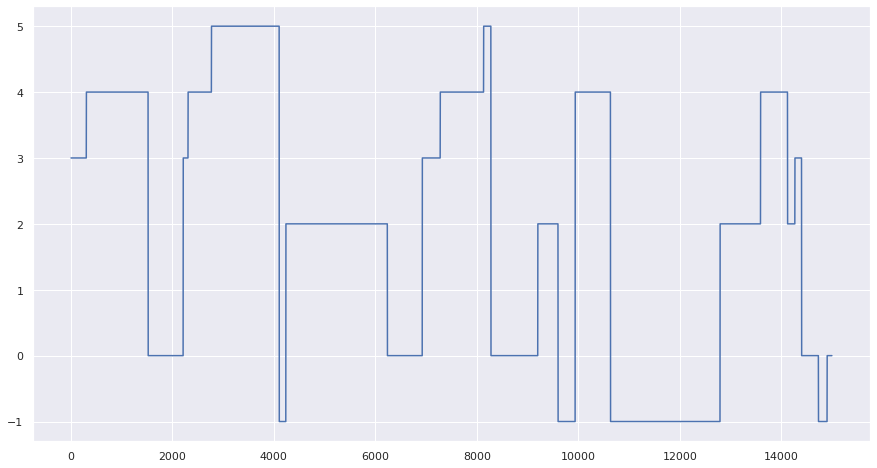

In [16]:
df_team_A.player_scoring_next.plot()

## Normal distribution of player 0 x velocity 🚘

<AxesSubplot:>

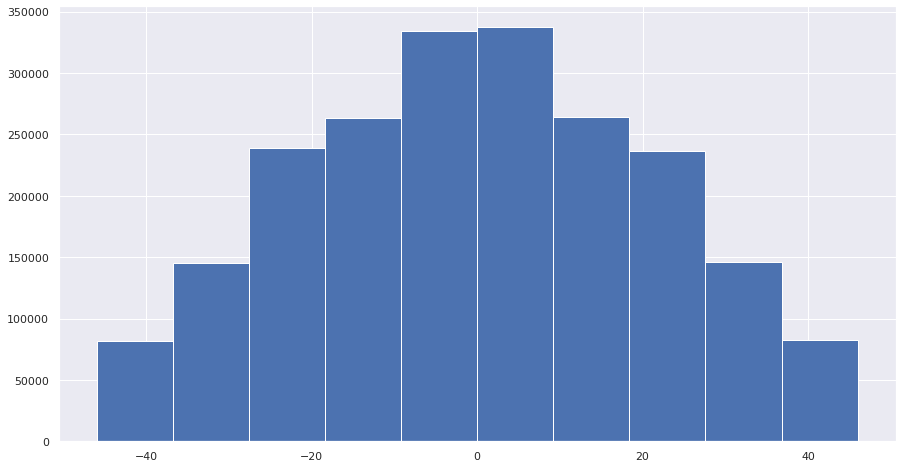

In [17]:
df.p0_vel_x.hist()

## Left skewed distribution of player 0 y velocity 🚘

<AxesSubplot:>

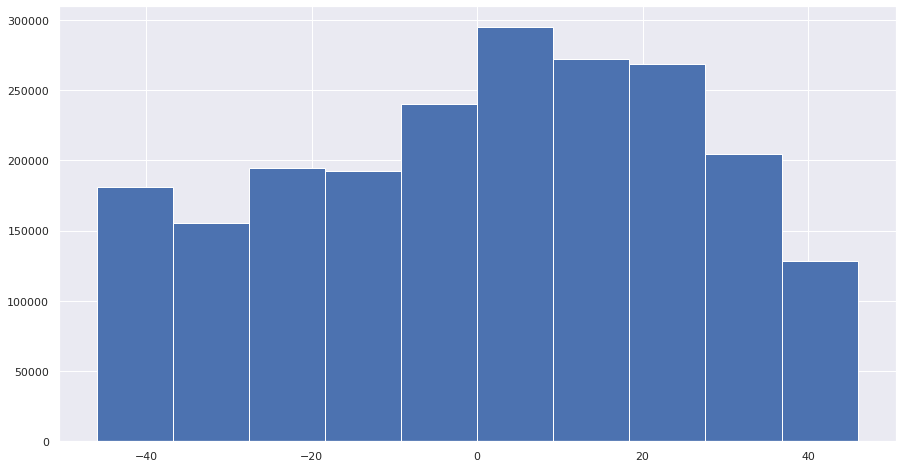

In [18]:
df.p0_vel_y.hist()

## Either you're boosting or you aren't  🚀

<AxesSubplot:>

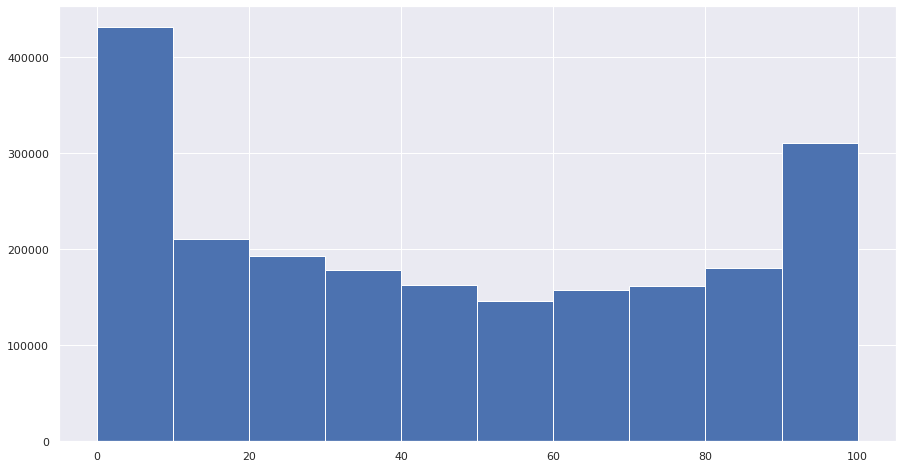

In [19]:
df.p0_boost.hist()

## Ball y x Position Heatmap 🔥

In [20]:
df_pos = df.iloc[:30000]
fig = px.density_heatmap(df_pos, x="ball_pos_y", y="ball_pos_x", nbinsx = 250, nbinsy = 175, color_continuous_scale = "Portland", range_color=(0, 3.6))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#FFFFFF"))
fig.show()

## Ball y z Position Heatmap 🔥

In [21]:
fig = px.density_heatmap(df_pos, x="ball_pos_y", y="ball_pos_z", nbinsx = 250, nbinsy = 200, color_continuous_scale = "Portland", range_color=(0, 3.6))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#FFFFFF"))
fig.show()

## Animation of ball during goal event: Ball resets to ball_pos_x = 0 and ball_pos_y = 0

In [22]:
df_iloc = df.iloc[1400:1540]

fig = px.scatter_3d(df_iloc, x = "ball_pos_x", y = "ball_pos_y", z = "ball_pos_z",
                    range_x = (80.8, -80.8),
                    range_y = (106.392, -104.392),
                    range_z = (1.296, 39.4372),
                    animation_frame = "event_time",
                    color_discrete_sequence = ["#FFFFFF"])

fig.update_traces(marker = dict(size = 6))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 0.0000001
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 0.0000001
fig.update_coloraxes(showscale = False)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#FFFFFF"))
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="#950000",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="#950000",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="#950000",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
fig.show()

## Animation of car during demolition event
## Null values: A demolition occurs when the animation goes blank

## What is Demolition in Rocket League?
Demolition is referred to the bumps occur when a player runs into another player at supersonic speed. The victim of a demolition will explode and combust, but will respawn near their team's goal after a few seconds. If two players run into each other both at supersonic speed and their fenders collide, they will both be demolished. In higher-level gameplay, demolitions are sometimes used tactically to prevent an opponent from scoring, or to clear the way for a teammate to score.

In [23]:
df_iloc_car = df.iloc[600:800]

fig = px.scatter_3d(df_iloc_car, x = "p0_pos_x", y = "p0_pos_y", z = "p0_pos_z",
                    range_x = (80.8, -80.8),
                    range_y = (104.392, -104.392),
                    range_z = (0, 39.4372),
                    animation_frame = "event_time",
                    color_discrete_sequence = ["#FFFFFF"])

fig.update_traces(marker = dict(size = 6))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 0.0000001
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 0.0000001
fig.update_coloraxes(showscale = False)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#FFFFFF"))
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="#950000",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="#950000",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="#950000",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
fig.show()

## Driver Racepaths: 3 Orange (Red) Team, 3 Blue Team

In [24]:
df0 = df.iloc[:5000]
colors = ["#9B000A", "#9B000A", "#9B000A", "#0A009B", "#0A009B", "#0A009B"]

for i in range(6):
    
    fig = px.line_3d(df0, x=f"p{i}_pos_x", y=f"p{i}_pos_y", z=f"p{i}_pos_z")
    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#FFFFFF"))
    fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="#00B60C",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="#00B60C",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="#00B60C",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
    fig.update_traces(line_color = colors[i], textposition = "top center")
    fig.show()